## Fingerprint Comparator

A relatively simple program to compare the ROC-AUC produced by different fingerprint methodologies available in Molfeat by Datamol.

Import dependencies

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
from tqdm import tqdm
from Modules import Fingerprint_Comparator, Fingerprint_Generator, Misc_Utils


from molfeat import trans
from molfeat.trans import pretrained
from sklearn import ensemble, model_selection

warnings.simplefilter(action="ignore", category=FutureWarning)

Read a generic dataset. Must have a column of SMILES strings and a binary-coded DILI column.

In [15]:
tox_df = pd.read_csv("Transformed_Data/Final_DILI.csv")

Define the fingerprints to compare

In [16]:
regular_fingerprints = Fingerprint_Generator.Fingerprint_Types().regular_fingerprints()
regular_fingerprints = ['ecfp', 'maccs', 'ecfp-count']

hf_fingerprints = [
    "ChemGPT-4.7M",
    "ChemGPT-19M",
    "GPT2-Zinc480M-87M",
    "MolT5",
]

Instantiate a scikit-learn random forest classifier and define a function to compute the average ROC-AUC score.

### The main loop
* Create a tuple of Molfeat fingerprint types to compare
* Make a Pandas dataframe of SMILES strings
* Convert SMILES strings to an arbitrary Molfeat fingerprint type using Molfeat
* Set features & labels
* Average the ROC-AUC score of a scikit-learn classifier model across 5 cross-validations
* Print mean scores as they are computed & **append them to a list of scores**

In [17]:
model_rf = ensemble.RandomForestClassifier(random_state=42)

comparator_output = Fingerprint_Comparator.SKlearn(smiles=tox_df["SMILES"],labels=tox_df["DILI?"], scoring="roc_auc", sklearn_classifier=model_rf).regular_fingerprint(regular_fingerprints)

100%|██████████| 3/3 [00:07<00:00,  2.62s/it]


In [18]:
comparator_output.head(2)

,Fingerprint,Score (roc_auc)
0,ecfp,"[0.9182098765432098, 0.8641975308641975, 0.894..."
1,maccs,"[0.9583333333333334, 0.8834876543209876, 0.909..."


In [19]:
comparator_output_exploded = comparator_output.explode(column="Score (roc_auc)")
comparator_output_exploded.head(2)

,Fingerprint,Score (roc_auc)
0,ecfp,0.91821
0,ecfp,0.864198


Manually input desired fingerprints

In [20]:
# fp = [str(fps) for fps in input("Enter fingerprints:").split()]

Chart presentation calculations
* Compute mean AUC-ROC score. This is used to set a the baseline (mean) score
* Add a dataframe column for the size of the ROC-AUC score when the normalised chart is used. Necessary to prevent full-size bar being shown as should be in the case when 0 is the baseline.
* Sort dataframe so the chart is sorted

Seaborn barplot generation - Normalised to mean with rotated X-axis labels

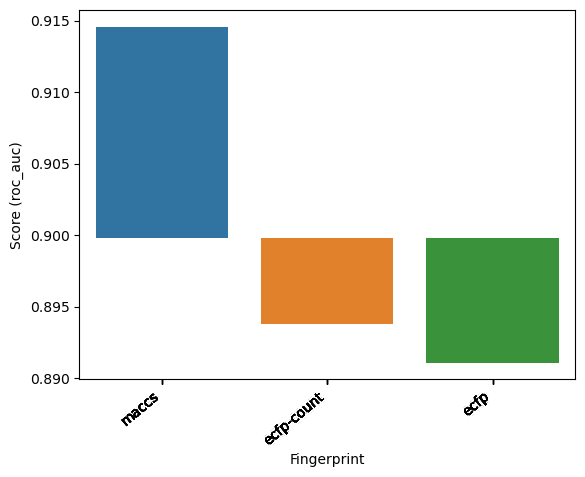

In [31]:
mean_comparator_output_exploded, scores_mean_exploded = Misc_Utils.get_average_score(comparator_output_exploded, "Score (roc_auc)", normalize_scores=True)

# Generate Seaborn Plot with 95% CIs
fp_plot = sns.barplot(
    mean_comparator_output_exploded,
    x="Fingerprint",
    y="Score (roc_auc)",
    hue="Fingerprint",
    errorbar=None,
    bottom=scores_mean_exploded,
)

fp_plot.xaxis.set_ticks(mean_comparator_output_exploded["Fingerprint"])
fp_plot.set_xticklabels(fp_plot.get_xticklabels(), rotation=40, ha="right");  # Rotate X-axis labels


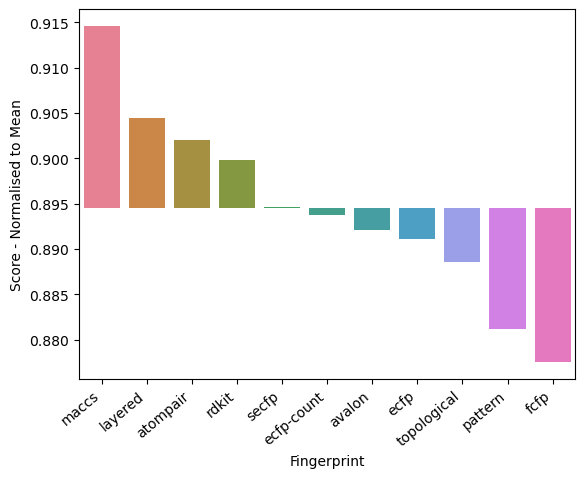

In [115]:
# Generate a Seaborn barplot - Normalised to mean
fp_plot_normalised = sns.barplot(
    mean_comparator_output_exploded,
    errorbar=None,
    x="Fingerprint",
    y="Score - Normalised to Mean",
    hue="Fingerprint",
    bottom=scores_mean_exploded,
)

# The semicolons at the line end stop Seaborn printing a dataframe
fp_plot_normalised.xaxis.set_ticks(mean_comparator_output_exploded["Fingerprint"])
# Prevent Seaborn error if x-axis ticks not explicitly defined before the next line is run
fp_plot_normalised.set_xticklabels(fp_plot_normalised.get_xticklabels(), rotation=40, ha="right");  # Rotate X-axis labels

Version 0.1 completed on 24/10/23 @ ~ 11pm  
0.2 - 26/10/20 ~ @11pm

## Thanks to

For the fingerprint comparator and visualisation concept  
https://sergeykolchenko.medium.com/evaluating-molecular-representations-for-property-prediction-a-computational-chemistry-approach-93246c75be6a

For examples on implementing Molfeat calculators and transformers  
https://colab.research.google.com/github/PatWalters/practical_cheminformatics_tutorials/blob/main/ml_models/QSAR_in_8_lines.ipynb#scrollTo=8488ccfb

For barchart normalisation  
https://stackoverflow.com/questions/67037903/how-do-i-plot-a-barchart-from-the-datasets-mean-value-and-not-its-default-0-valu

For barchart X-axis ordering  
https://stackoverflow.com/questions/43770507/seaborn-bar-plot-ordering

For reducing Seaborn complaining
https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator

To fix a Jupyter Notebook warning
https://stackoverflow.com/questions/53247985/tqdm-4-28-1-in-jupyter-notebook-intprogress-not-found-please-update-jupyter-an